In [1]:
pip install neuralprophet

   ---------------------------------------- 0.0/145.4 kB ? eta -:--:--
   -------- ------------------------------- 30.7/145.4 kB 1.4 MB/s eta 0:00:01
   ---------- ---------------------------- 41.0/145.4 kB 991.0 kB/s eta 0:00:01
   ------------- ------------------------- 51.2/145.4 kB 375.8 kB/s eta 0:00:01
   --------------------- ----------------- 81.9/145.4 kB 512.0 kB/s eta 0:00:01
   -------------------------------------  143.4/145.4 kB 711.9 kB/s eta 0:00:01
   -------------------------------------- 145.4/145.4 kB 617.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.3 MB 6.4 MB/s eta 0:00:01
   --- ------------------------------------ 0.1/1.3 MB 6.4 MB/s eta 0:00:01
   --- ------------------------------------ 0.1/1.3 MB 6.4 MB/s eta 0:00:01
   ------ --------------------------------- 0.2/1.3 MB 1.2 MB/s eta 0:00:01
   ------- -------------------------------- 0.2/1.3 MB 1.4 MB/s eta 0:00:01
 

In [2]:
pip install neuralprophet[live]

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from neuralprophet import NeuralProphet
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


In [4]:
#read the data
df = pd.read_csv("DailyDataFinal.csv", parse_dates=['date'], delimiter=',')

In [5]:
#check the dtypes
print(df.dtypes)

campaign name                           object
date                            datetime64[ns]
clicks                                   int64
impressions                              int64
cost_micros                              int64
bidding_strategy_type                   object
conversions                            float64
cost_per_conversion                    float64
Click-through rate (CTR)               float64
average cost per click (CPC)           float64
cost-per-acquisition (CPA)             float64
Cost                                   float64
conversion_per_euro                    float64
budget                                   int64
isholiday                                int64
dtype: object


In [6]:
df['date'] = pd.to_datetime(df.date , format = '%d/%m/%Y %H.%M.%S')

In [7]:
df.head(3)

,campaign name,date,clicks,impressions,cost_micros,bidding_strategy_type,conversions,cost_per_conversion,Click-through rate (CTR),average cost per click (CPC),cost-per-acquisition (CPA),Cost,conversion_per_euro,budget,isholiday
0,SHOPTIMISED PMax-46 - all products-M,2023-11-28,0,33,0,MAXIMIZE_CONVERSION_VALUE,0.0,NaN,0.000000,0.000000,0.000000,0.00,0.000000,5,0
1,SHOPTIMISED PMax-46 - all products-M,2023-11-29,11,1139,4060000,MAXIMIZE_CONVERSION_VALUE,1.0,4060000.0,0.965759,0.369091,4.060000,4.06,0.246305,2,0
2,SHOPTIMISED PMax-46 - all products-M,2023-11-30,7,655,1430000,MAXIMIZE_CONVERSION_VALUE,0.0,NaN,1.068702,0.204286,4.085714,1.43,0.000000,2,0


In [8]:
df.drop(['campaign name','clicks','impressions','cost_micros','bidding_strategy_type','cost_per_conversion','Click-through rate (CTR)','average cost per click (CPC)','cost-per-acquisition (CPA)','conversion_per_euro','Cost'],axis=1, inplace=True)

In [9]:
df.head(5)

,date,conversions,budget,isholiday
0,2023-11-28,0.000000,5,0
1,2023-11-29,1.000000,2,0
2,2023-11-30,0.000000,2,0
3,2023-12-01,0.000000,7,0
4,2023-12-02,3.332276,7,0


In [10]:
df.date.dt.year

0      2023
1      2023
2      2023
3      2023
4      2023
       ... 
176    2024
177    2024
178    2024
179    2024
180    2024
Name: date, Length: 181, dtype: int32

In [11]:
df['year']=df.date.dt.year
df['month']=df.date.dt.month
df['day']=df.date.dt.day
df['week']=df.date.dt.dayofweek

In [12]:
df

,date,conversions,budget,isholiday,year,month,day,week
0,2023-11-28,0.000000,5,0,2023,11,28,1
1,2023-11-29,1.000000,2,0,2023,11,29,2
2,2023-11-30,0.000000,2,0,2023,11,30,3
3,2023-12-01,0.000000,7,0,2023,12,1,4
4,2023-12-02,3.332276,7,0,2023,12,2,5
...,...,...,...,...,...,...,...,...
176,2024-05-22,1.000000,20,0,2024,5,22,2
177,2024-05-23,2.000000,20,0,2024,5,23,3
178,2024-05-24,1.000000,20,0,2024,5,24,4
179,2024-05-25,0.998544,20,0,2024,5,25,5


In [13]:
def applyer(row):
    if row.dayofweek==5 or row.dayofweek==6:
        return 1
    else:
        return 0

In [14]:
df['isweekend']=df['date'].apply(applyer)
df

,date,conversions,budget,isholiday,year,month,day,week,isweekend
0,2023-11-28,0.000000,5,0,2023,11,28,1,0
1,2023-11-29,1.000000,2,0,2023,11,29,2,0
2,2023-11-30,0.000000,2,0,2023,11,30,3,0
3,2023-12-01,0.000000,7,0,2023,12,1,4,0
4,2023-12-02,3.332276,7,0,2023,12,2,5,1
...,...,...,...,...,...,...,...,...,...
176,2024-05-22,1.000000,20,0,2024,5,22,2,0
177,2024-05-23,2.000000,20,0,2024,5,23,3,0
178,2024-05-24,1.000000,20,0,2024,5,24,4,0
179,2024-05-25,0.998544,20,0,2024,5,25,5,1


## conversion

In [15]:
conv =df.rename(columns={'date': 'ds', 'conversions': 'y'})

In [16]:
#creating the train and validation set
train = conv[:int(0.8*(len(conv)))]
valid = conv[int(0.8*(len(conv))):]

In [17]:
train.dtypes

ds           datetime64[ns]
y                   float64
budget                int64
isholiday             int64
year                  int32
month                 int32
day                   int32
week                  int32
isweekend             int64
dtype: object

In [18]:
train.head(5)

,ds,y,budget,isholiday,year,month,day,week,isweekend
0,2023-11-28,0.000000,5,0,2023,11,28,1,0
1,2023-11-29,1.000000,2,0,2023,11,29,2,0
2,2023-11-30,0.000000,2,0,2023,11,30,3,0
3,2023-12-01,0.000000,7,0,2023,12,1,4,0
4,2023-12-02,3.332276,7,0,2023,12,2,5,1


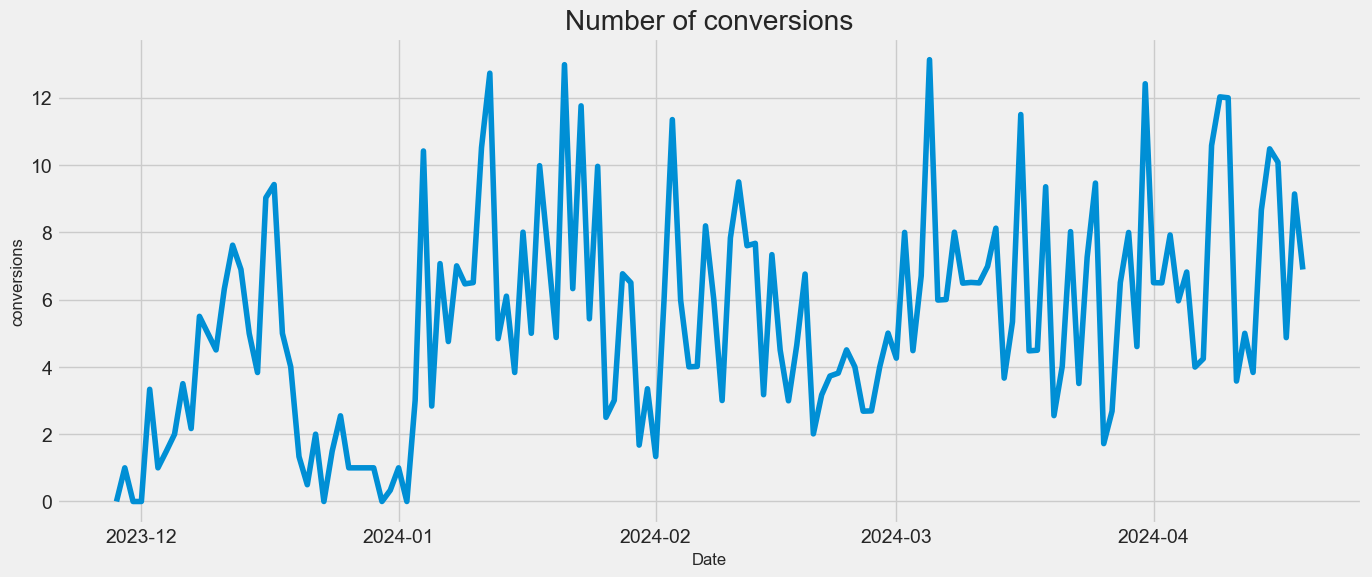

In [19]:
plt.figure(figsize = (15, 6))
plt.plot(train['ds'], train['y'])
plt.xlabel('Date', {'fontsize': 12})
plt.ylabel('conversions', {'fontsize': 12})
plt.title('Number of conversions')
plt.show()

In [170]:
#fit the model
model = NeuralProphet(epochs=300, batch_size=16,learning_rate=0.1)
# model.set_plotting_backend("plotly-static")
model.add_country_holidays('GB')
model.add_future_regressor('budget')
model.add_future_regressor('isholiday')
model.add_future_regressor('year')
model.add_future_regressor('month')
model.add_future_regressor('day')
model.add_future_regressor('week')
model.add_future_regressor('isweekend')
metrics=model.fit(train,freq="H")

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - C:\Users\Digitweb Sathurjan\anaconda3\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.306% of the data.
WARNING - (py.warnings._showwarnmsg) - C:\Users\Digitweb Sathurjan\anaconda3\Lib\site-packages\neuralprophet\df_utils.py:1173: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  aux_ts = pd.DataFrame(pd.date_range("1994-01-01", periods=100, freq=freq_str))

WARNING - (py.warnings._showwarnmsg) - C:\Users\Digitweb Sathurjan\anaconda3\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: 

Training: 0it [00:00, ?it/s]

In [171]:
metrics

,MAE,RMSE,Loss,RegLoss,epoch
0,16.570644,19.407690,0.948758,0.0,0
1,12.824316,15.506337,0.696524,0.0,1
2,10.060781,12.606425,0.521756,0.0,2
3,8.726513,10.759089,0.447535,0.0,3
4,7.751850,9.344617,0.391112,0.0,4
...,...,...,...,...,...
295,1.827348,2.240278,0.049866,0.0,295
296,1.827499,2.291049,0.049835,0.0,296
297,1.827726,2.286822,0.049866,0.0,297
298,1.828744,2.249610,0.049873,0.0,298


In [172]:
valid_predict=model.predict(valid)

WARNING - (py.warnings._showwarnmsg) - C:\Users\Digitweb Sathurjan\anaconda3\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.297% of the data.
WARNING - (py.warnings._showwarnmsg) - C:\Users\Digitweb Sathurjan\anaconda3\Lib\site-packages\neuralprophet\df_utils.py:1173: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  aux_ts = pd.DataFrame(pd.date_range("1994-01-01", periods=100, freq=freq_str))

WARNING - (py.warnings._showwarnmsg) - C:\Users\Digitweb Sathurjan\anaconda3\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
 

Predicting: 9it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [173]:
valid_predict

,ds,y,yhat1,trend,season_weekly,events_additive,event_Boxing Day,event_Christmas Day,event_Coronation of Charles III,event_Good Friday,...,event_New Year's Day (observed),event_Spring Bank Holiday,future_regressors_additive,future_regressor_budget,future_regressor_day,future_regressor_isholiday,future_regressor_isweekend,future_regressor_month,future_regressor_week,future_regressor_year
0,2024-04-20,6.016440,6.999069,-1.332423,4.144331,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,4.187161,6.441965,-0.430833,0.000000,-0.791905,1.556228,-9.616192,7.027899
1,2024-04-21,5.166667,7.971721,-1.308881,7.039354,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,2.241247,6.441965,-0.453509,0.000000,-0.791905,1.556228,-11.539431,7.027899
2,2024-04-22,4.321665,7.679781,-1.285338,-5.584788,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,14.549907,6.441965,-0.476184,0.000000,0.000000,1.556228,0.000000,7.027899
3,2024-04-23,6.358181,7.661749,-1.261795,-3.680448,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,12.603992,6.441965,-0.498859,0.000000,0.000000,1.556228,-1.923239,7.027899
4,2024-04-24,4.527653,3.918102,-1.238252,-2.817573,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,7.973927,3.757812,-0.521535,0.000000,0.000000,1.556228,-3.846477,7.027899
5,2024-04-25,5.234060,4.429226,-1.214709,-0.384078,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,6.028014,3.757812,-0.544210,0.000000,0.000000,1.556228,-5.769715,7.027899
6,2024-04-26,9.095239,4.168236,-1.191167,1.277303,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,4.082099,3.757812,-0.566886,0.000000,0.000000,1.556228,-7.692954,7.027899
7,2024-04-27,10.127772,4.317963,-1.167624,4.141305,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,1.344281,3.757812,-0.589561,0.000000,-0.791905,1.556228,-9.616192,7.027899
8,2024-04-28,4.161246,5.294987,-1.144081,7.040701,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.601633,3.757812,-0.612237,0.000000,-0.791905,1.556228,-11.539431,7.027899
9,2024-04-29,4.998920,5.002018,-1.120538,-5.584471,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,11.707027,3.757812,-0.634912,0.000000,0.000000,1.556228,0.000000,7.027899


In [174]:
predicted=pd.DataFrame()
predicted['date']=valid_predict.ds
predicted['conversions']=valid_predict.yhat1

In [175]:
actual=pd.DataFrame()
actual['date']=valid.ds
actual['conversions']=valid.y
actual['budget']=valid.budget
actual['isholiday']=valid.isholiday
actual['year']=valid.year
actual['month']=valid.month
actual['day']=valid.day
actual['week']=valid.week
actual['isweekend']=valid.isweekend

In [176]:
actual.set_index(actual.date,inplace=True)
predicted.set_index(predicted.date,inplace=True)
actual

,date,conversions,budget,isholiday,year,month,day,week,isweekend
date,,,,,,,,,
2024-04-20,2024-04-20,6.016440,50,0,2024,4,20,5,1
2024-04-21,2024-04-21,5.166667,50,0,2024,4,21,6,1
2024-04-22,2024-04-22,4.321665,50,0,2024,4,22,0,0
2024-04-23,2024-04-23,6.358181,50,0,2024,4,23,1,0
2024-04-24,2024-04-24,4.527653,30,0,2024,4,24,2,0
2024-04-25,2024-04-25,5.234060,30,0,2024,4,25,3,0
2024-04-26,2024-04-26,9.095239,30,0,2024,4,26,4,0
2024-04-27,2024-04-27,10.127772,30,0,2024,4,27,5,1
2024-04-28,2024-04-28,4.161246,30,0,2024,4,28,6,1


In [177]:
predicted

,date,conversions
date,,
2024-04-20,2024-04-20,6.999069
2024-04-21,2024-04-21,7.971721
2024-04-22,2024-04-22,7.679781
2024-04-23,2024-04-23,7.661749
2024-04-24,2024-04-24,3.918102
2024-04-25,2024-04-25,4.429226
2024-04-26,2024-04-26,4.168236
2024-04-27,2024-04-27,4.317963
2024-04-28,2024-04-28,5.294987


In [178]:
#Combine the actual result and predicted result side by side
result=pd.DataFrame()

result['Actual Conversions']=actual['conversions']
result['Predicted Conversions']=predicted['conversions']

# result['Actual Cost']=actual['cost']
# result['Predicted Cost']=predicted['cost']

# result['Actual week']=actual['week']
# result['Predicted week']=predicted['week']


In [179]:
result.tail(30)

,Actual Conversions,Predicted Conversions
date,,
2024-04-27,10.127772,4.317963
2024-04-28,4.161246,5.294987
2024-04-29,4.998920,5.002018
2024-04-30,4.000000,4.986141
2024-05-01,1.000000,5.119374
2024-05-02,3.002452,5.631210
2024-05-03,6.543285,4.035440
2024-05-04,1.250000,4.186954
2024-05-05,4.333333,5.156312


In [180]:
#check rmse
cols = train.columns
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('rmse value is : ', sqrt(mean_squared_error(result['Predicted Conversions'], result['Actual Conversions'])))
print('mse value is : ', mean_squared_error(result['Predicted Conversions'], result['Actual Conversions']))
print('mean absolute error is : ', mean_absolute_error(result['Actual Conversions'], result['Predicted Conversions']))

rmse value is :  2.8322164725721204
mse value is :  8.021450147508864
mean absolute error is :  2.387434434550105


In [181]:
finalModel = NeuralProphet(epochs=300, batch_size=16,learning_rate=0.1)
finalModel.add_future_regressor('budget')
finalModel.add_future_regressor('isholiday')
finalModel.add_future_regressor('year')
finalModel.add_future_regressor('month')
finalModel.add_future_regressor('day')
finalModel.add_future_regressor('week')
finalModel.add_future_regressor('isweekend')
final_metrics=finalModel.fit(conv)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - C:\Users\Digitweb Sathurjan\anaconda3\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.448% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=T

Training: 0it [00:00, ?it/s]

In [184]:
future =finalModel.make_future_dataframe(df=conv,periods=10)
future['budget']=20
future['isholiday']=0
future['year']=future.ds.dt.year
future['month']=future.ds.dt.month
future['day']=future.ds.dt.day
future['week']=future.ds.dt.dayofweek
future['isweekend']=future.ds.apply(applyer)

future.tail(15)

WARNING - (py.warnings._showwarnmsg) - C:\Users\Digitweb Sathurjan\anaconda3\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.448% of the data.
WARNING - (py.warnings._showwarnmsg) - C:\Users\Digitweb Sathurjan\anaconda3\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - C:\Users\Digitweb Sathurjan\anaconda3\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an altern

ValueError: Future values of all user specified regressors not provided

In [164]:
finalPrediction=finalModel.predict(future)

WARNING - (py.warnings._showwarnmsg) - C:\Users\Digitweb Sathurjan\anaconda3\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.476% of the data.
WARNING - (py.warnings._showwarnmsg) - C:\Users\Digitweb Sathurjan\anaconda3\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - C:\Users\Digitweb Sathurjan\anaconda3\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an altern

KeyError: 'y'

In [165]:
finalPrediction.tail(15)

NameError: name 'finalPrediction' is not defined

In [71]:
finalResult=pd.DataFrame()
finalResult['Date']=finalPrediction['ds']
finalResult['Forecasted Conversion']=finalPrediction['yhat']
finalResult['Actual Conversion']=conv.y

In [72]:
finalResult.tail(15)

,Date,Forecasted Conversion,Actual Conversion
177,2024-05-23,2.931893,2.000000
178,2024-05-24,2.671918,1.000000
179,2024-05-25,2.871584,0.998544
180,2024-05-26,3.569672,3.250000
181,2024-05-27,3.017931,0.000000
182,2024-05-28,2.958105,NaN
183,2024-05-29,2.043968,NaN
184,2024-05-30,2.579738,NaN
185,2024-05-31,2.319763,NaN
186,2024-06-01,3.814861,NaN
